#Imports

In [ ]:
!pip install pytrends
!pip install tslearn

In [ ]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Scraper

In [ ]:
pt = TrendReq(hl="en-US", tz=360)

In [ ]:
def scraper(name):
  df = pd.DataFrame()
  for i in range(11,24):
    pt.build_payload([name],timeframe='20'+str(i)+'-01-01 20'+str(i)+'-12-31',geo = "IN")
    temp = pt.interest_over_time()
    temp = temp.drop("isPartial",axis =1)
    df = pd.concat([df,temp])
  df.rename(columns={name:'all'},inplace=True)
  df.to_csv('/content/gdrive/My Drive/Open IIT DA 2023-24/'+name+'.csv', index=True)
  return df

scraper('Ayodhya')

,all
date,
2011-01-02,81
2011-01-09,79
2011-01-16,56
2011-01-23,32
2011-01-30,88
...,...
2023-09-10,51
2023-09-17,53
2023-09-24,54


#Compiliation of Datasets

In [ ]:
import os
import glob

In [ ]:
final_table = pd.read_csv('/content/gdrive/MyDrive/Open IIT DA 2023-24/All_data.csv')
final_table = final_table.drop("Unnamed: 3",axis = 1)

In [ ]:
os.chdir("/content/gdrive/MyDrive/all cities and places")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [ ]:
combined_csv = pd.concat([pd.read_csv(f,index_col = ['date']) for f in all_filenames],axis = 1)
combined_csv = combined_csv.transpose()
combined_csv = combined_csv.reset_index()
combined_csv = combined_csv.drop('index',axis = 1)

In [ ]:
keywords = []
substring = ".csv"
for string in all_filenames:
    keywords.append(string.replace(substring, ''))
all_filenames = keywords
keywords = []
substring = "Copy of "
for string in all_filenames:
    keywords.append(string.replace(substring, ''))

In [ ]:
cities = ['Delhi and Agra','Delhi and Agra','Delhi and Agra','Delhi and Agra','Haridwar',
          'Delhi and Agra','Delhi and Agra','Delhi and Agra','Delhi and Agra','Delhi and Agra',
          'Delhi and Agra','Delhi and Agra','Delhi and Agra','Delhi and Agra','Haridwar','Delhi and Agra',
          'Delhi and Agra','Delhi and Agra','Delhi and Agra','Delhi and Agra','Prayagraj','Prayagraj','Prayagraj',
          'Ayodhya','Haridwar','Dehradun','Haridwar','Dehradun','Prayagraj','Shimla','Kullu and Manali','Shimla',
          'Kullu and Manali','Kullu and Manali','Kullu and Manali','Kullu and Manali','Kullu and Manali','Dehradun',
          'Rishikesh','Haridwar','Rishikesh','Dehradun','Rishikesh','Rishikesh','Dehradun']

In [ ]:
states = []
for name in cities:
  states.append(final_table['State'][final_table[final_table['City'] == name].index.values[0]])

In [ ]:
combined_csv.insert(0,'Keyword',keywords)
combined_csv.insert(0,'Cities',cities)
combined_csv.insert(0,'States',states)

In [ ]:
combined_csv = combined_csv.drop(index = [25])
combined_csv = combined_csv.reset_index()
combined_csv = combined_csv.drop('index',axis = 1)

In [ ]:
combined_csv

date,States,Cities,Keyword,2011-01-02,2011-01-09,2011-01-16,2011-01-23,2011-01-30,2011-02-06,2011-02-13,...,2023-07-30,2023-08-06,2023-08-13,2023-08-20,2023-08-27,2023-09-03,2023-09-10,2023-09-17,2023-09-24,2023-10-01
0,Uttar Pradesh,Delhi and Agra,Taj Mahal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.0,68.0,72.0,63.0,56.0,64.0,62.0,64.0,73.0,71.0
1,Uttar Pradesh,Delhi and Agra,Qutub Minar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72.0,72.0,82.0,72.0,69.0,84.0,83.0,80.0,77.0,95.0
2,Uttar Pradesh,Delhi and Agra,Sarojini Market,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,47.0,53.0,58.0,50.0,50.0,62.0,48.0,55.0,56.0,71.0
3,Uttar Pradesh,Delhi and Agra,Lotus temple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70.0,66.0,80.0,69.0,70.0,66.0,59.0,79.0,72.0,93.0
4,Uttarakhand,Haridwar,Saptrishi Ashram,77.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,47.0,100.0,19.0,15.0,0.0,0.0,14.0,33.0,15.0
5,Uttar Pradesh,Delhi and Agra,Red Fort,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,51.0,100.0,41.0,35.0,34.0,36.0,37.0,42.0,46.0
6,Uttar Pradesh,Delhi and Agra,Mughal Gardens,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,5.0,8.0,7.0,4.0,10.0,10.0,6.0,2.0
7,Uttar Pradesh,Delhi and Agra,Jantar Mantar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,26.0,32.0,25.0,22.0,24.0,23.0,24.0,31.0,38.0
8,Uttar Pradesh,Delhi and Agra,India Gate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.0,57.0,85.0,50.0,52.0,51.0,50.0,55.0,54.0,62.0
9,Uttar Pradesh,Delhi and Agra,Jama Masjid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.0,58.0,67.0,65.0,72.0,59.0,73.0,85.0,63.0,72.0


In [ ]:
combined_csv.to_csv( "/content/gdrive/MyDrive/Open IIT DA 2023-24/combined_csv.csv", index=False)

#EDA

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import kpss
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Open IIT DA 2023-24/combined_csv.csv")
df = df.fillna(0)
df = df.drop([6])
month_df = df
month_df = month_df.drop(['index','States','Cities','Keyword'],axis = 1)
month_df.columns = pd.to_datetime(month_df.columns).to_period("M")
month_df = month_df.groupby(axis=1, level=0).mean()
month_df.insert(0,'Keyword',df['Keyword'])
month_df.insert(0,'Cities',df['Cities'])
month_df.insert(0,'States',df['States'])

In [ ]:
places = df['Keyword'].drop_duplicates().values
citylist = df['Cities'].unique()
statelist = df['States'].unique()

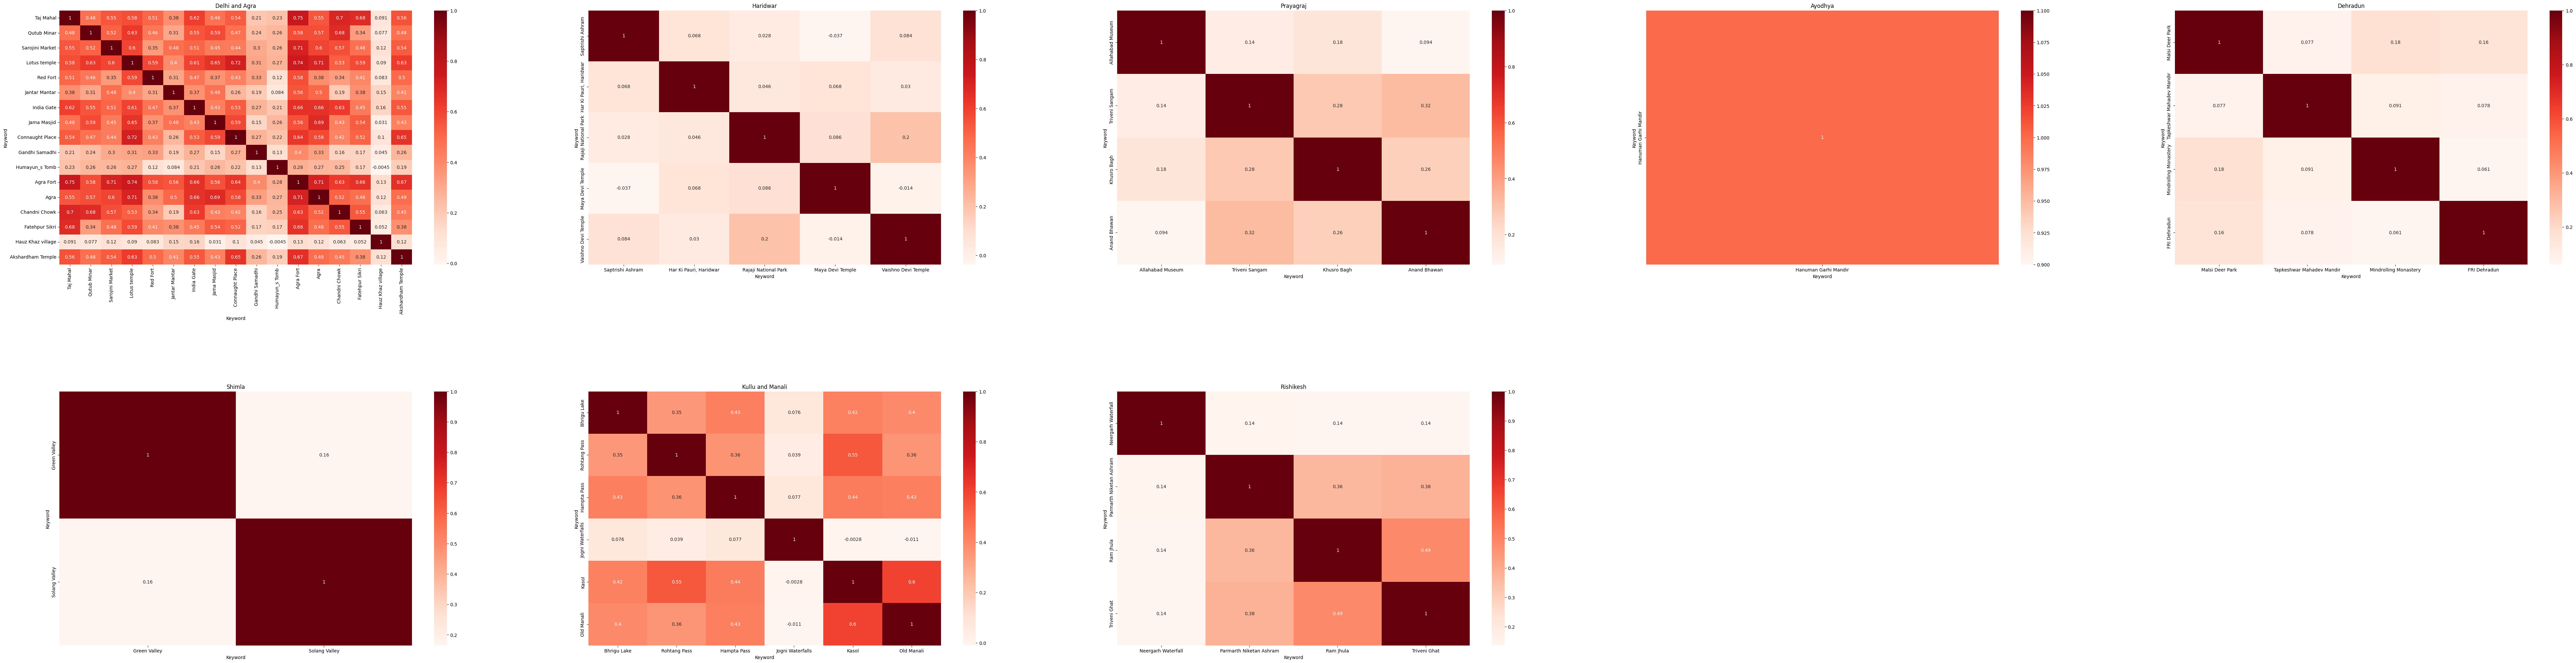

In [ ]:
fig = plt.figure(figsize=(100, 25))
plt.subplots_adjust(hspace=0.5)
sns.set_palette("Reds_r")

ncols = 5
nrows = len(citylist) // ncols + (len(citylist) % ncols > 0)

for n,city in enumerate(citylist):
    ax = plt.subplot(nrows,ncols, n + 1)
    df1 = df[df['Cities'] == city].drop(['index','States','Cities'],axis = 1)
    df1 = df1.set_index(df1['Keyword']).drop('Keyword',axis = 1)
    sns.heatmap(df1.transpose().corr(method = "pearson"),annot = True,cmap = "Reds")
    plt.title(city)

plt.show()

In [ ]:
def partialautocorrelation(data,name,axi):
  h1 = data.transpose().iloc[4:]
  h1.columns = data.transpose().iloc[3]
  plot_pacf(h1,ax = axi)
  plt.title(name)

In [ ]:
def autocorrelation(data,name,axi):
  h1 = data.transpose().iloc[4:]
  h1.columns = data.transpose().iloc[3]
  plot_acf(h1,ax = axi)
  plt.title(name)

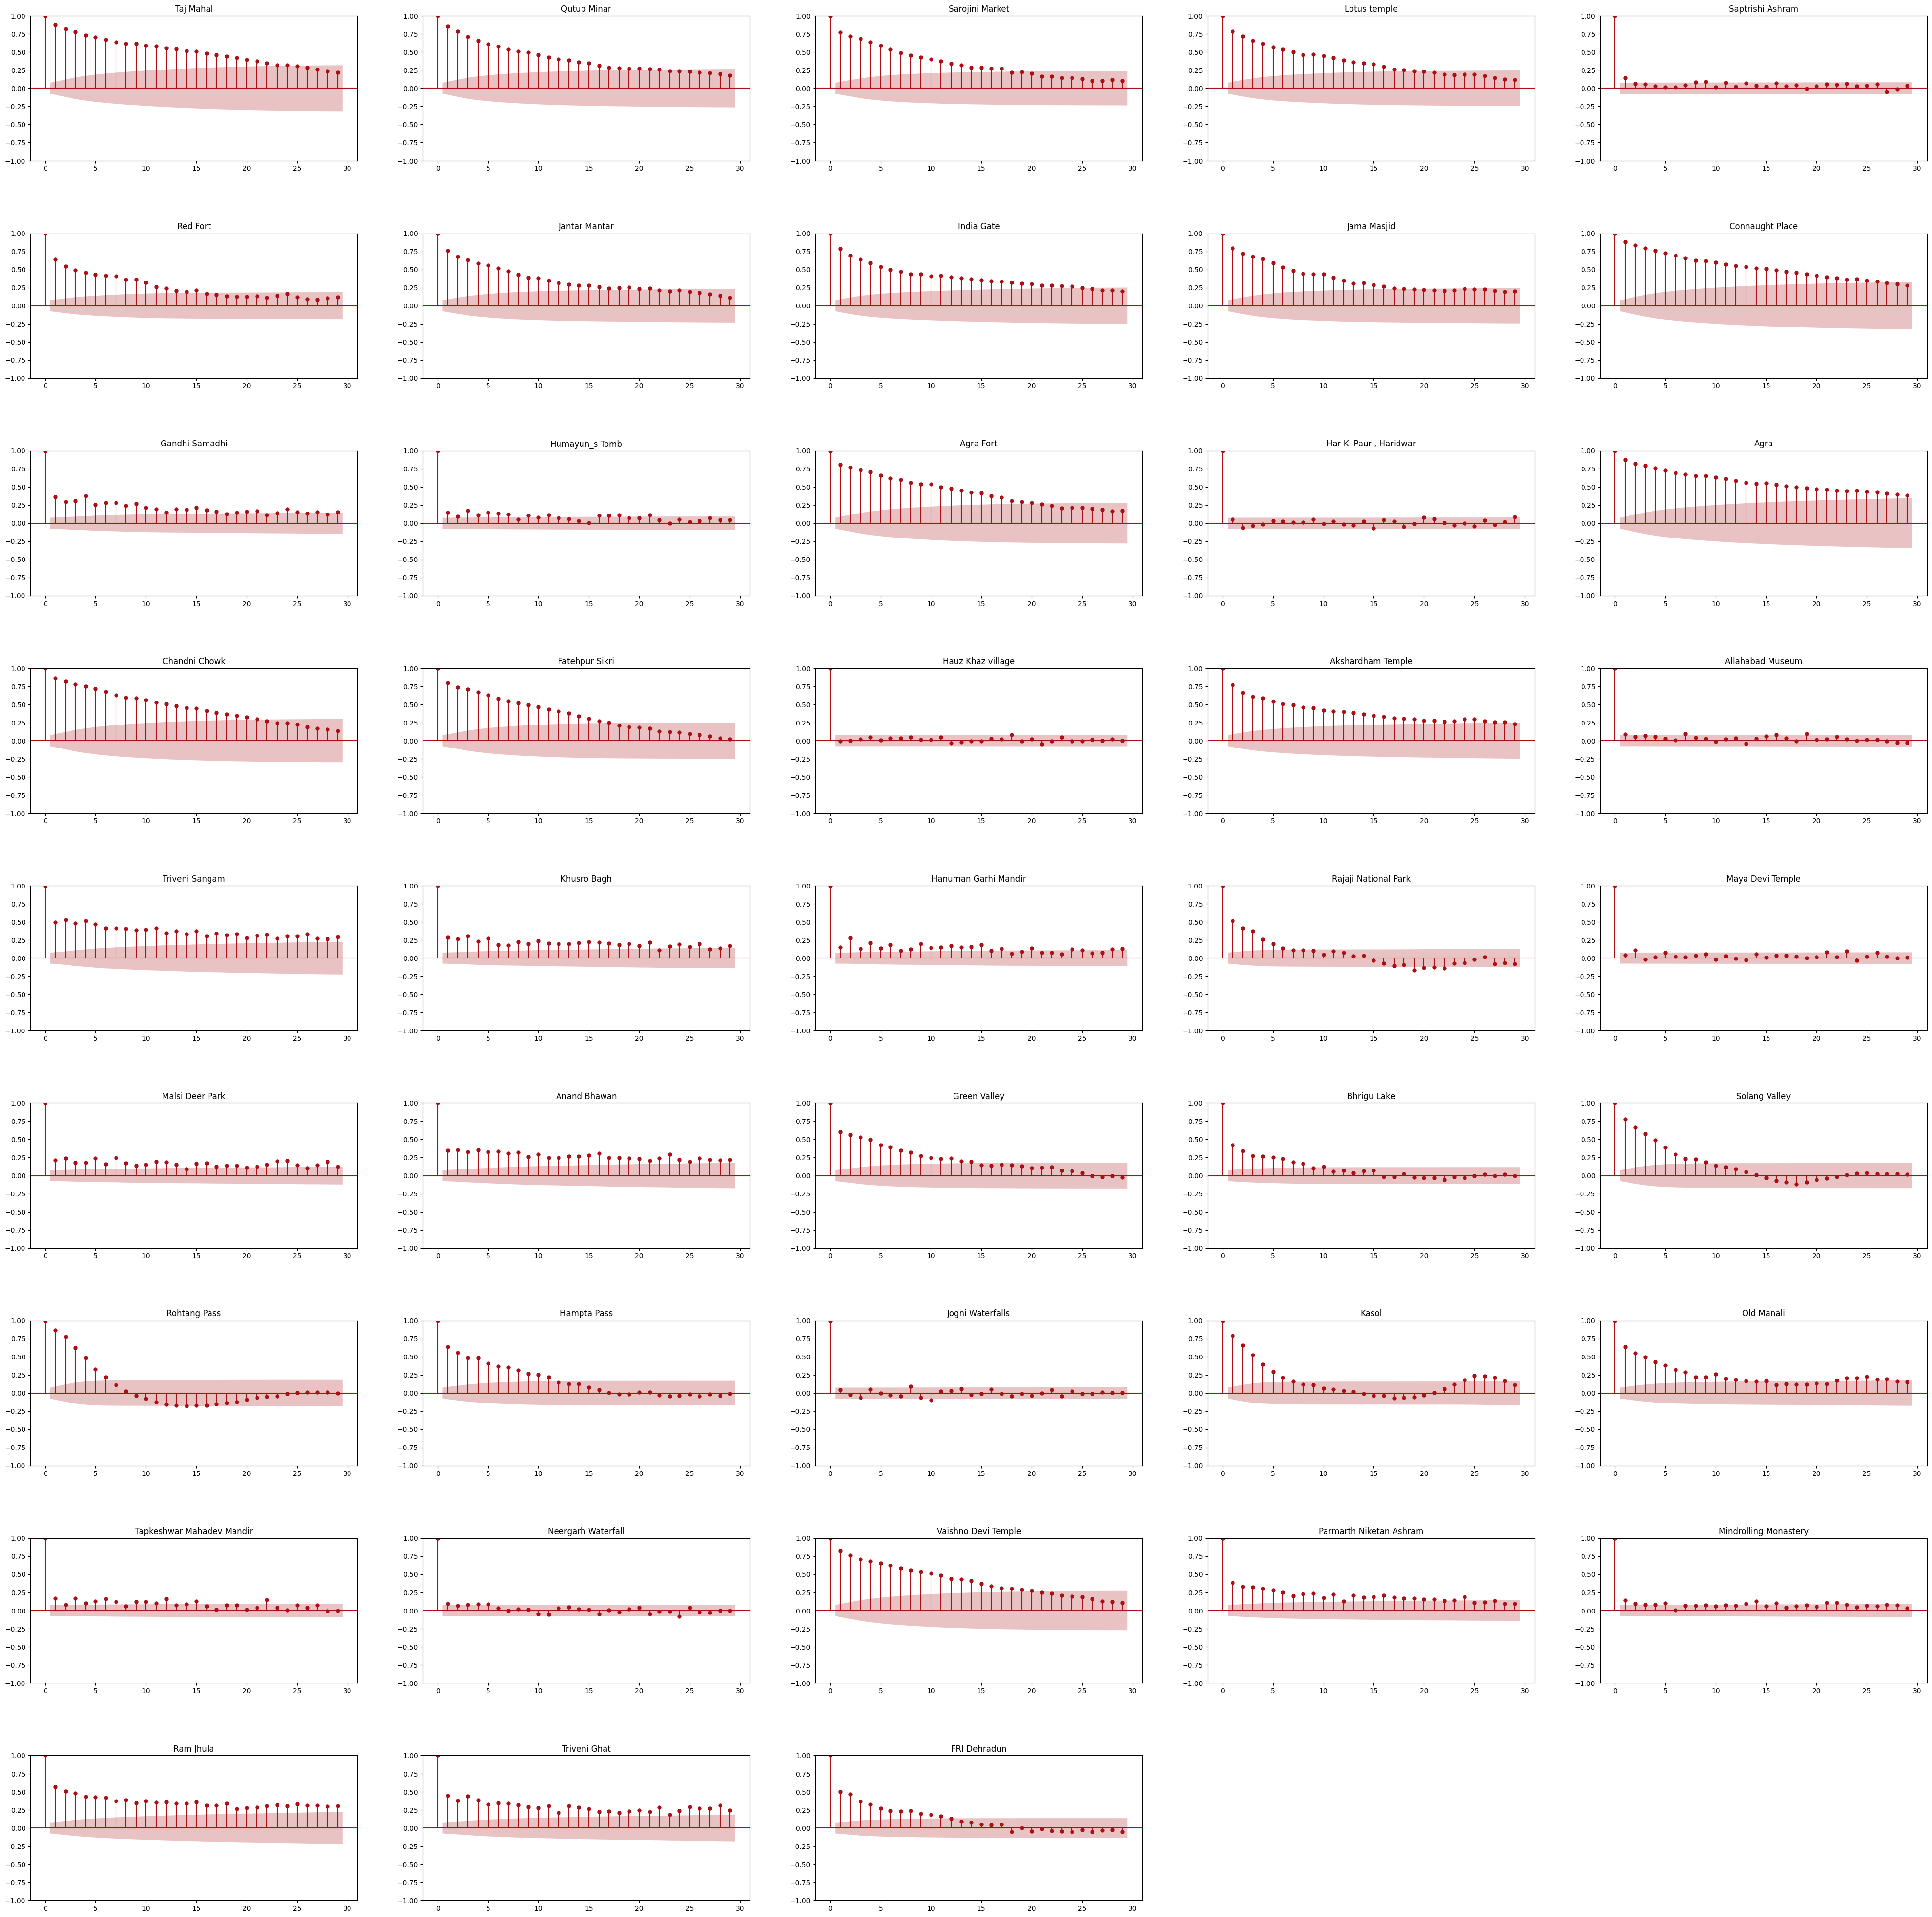

In [ ]:
fig = plt.figure(figsize=(50, 50))
plt.subplots_adjust(hspace=0.5)

ncols = 5
nrows = len(places) // ncols + (len(places) % ncols > 0)

for n,place in enumerate(places):
    ax = plt.subplot(nrows,ncols, n + 1)
    df1 = df.loc[(df['Keyword'] == place)]
    autocorrelation(df1,place,ax)

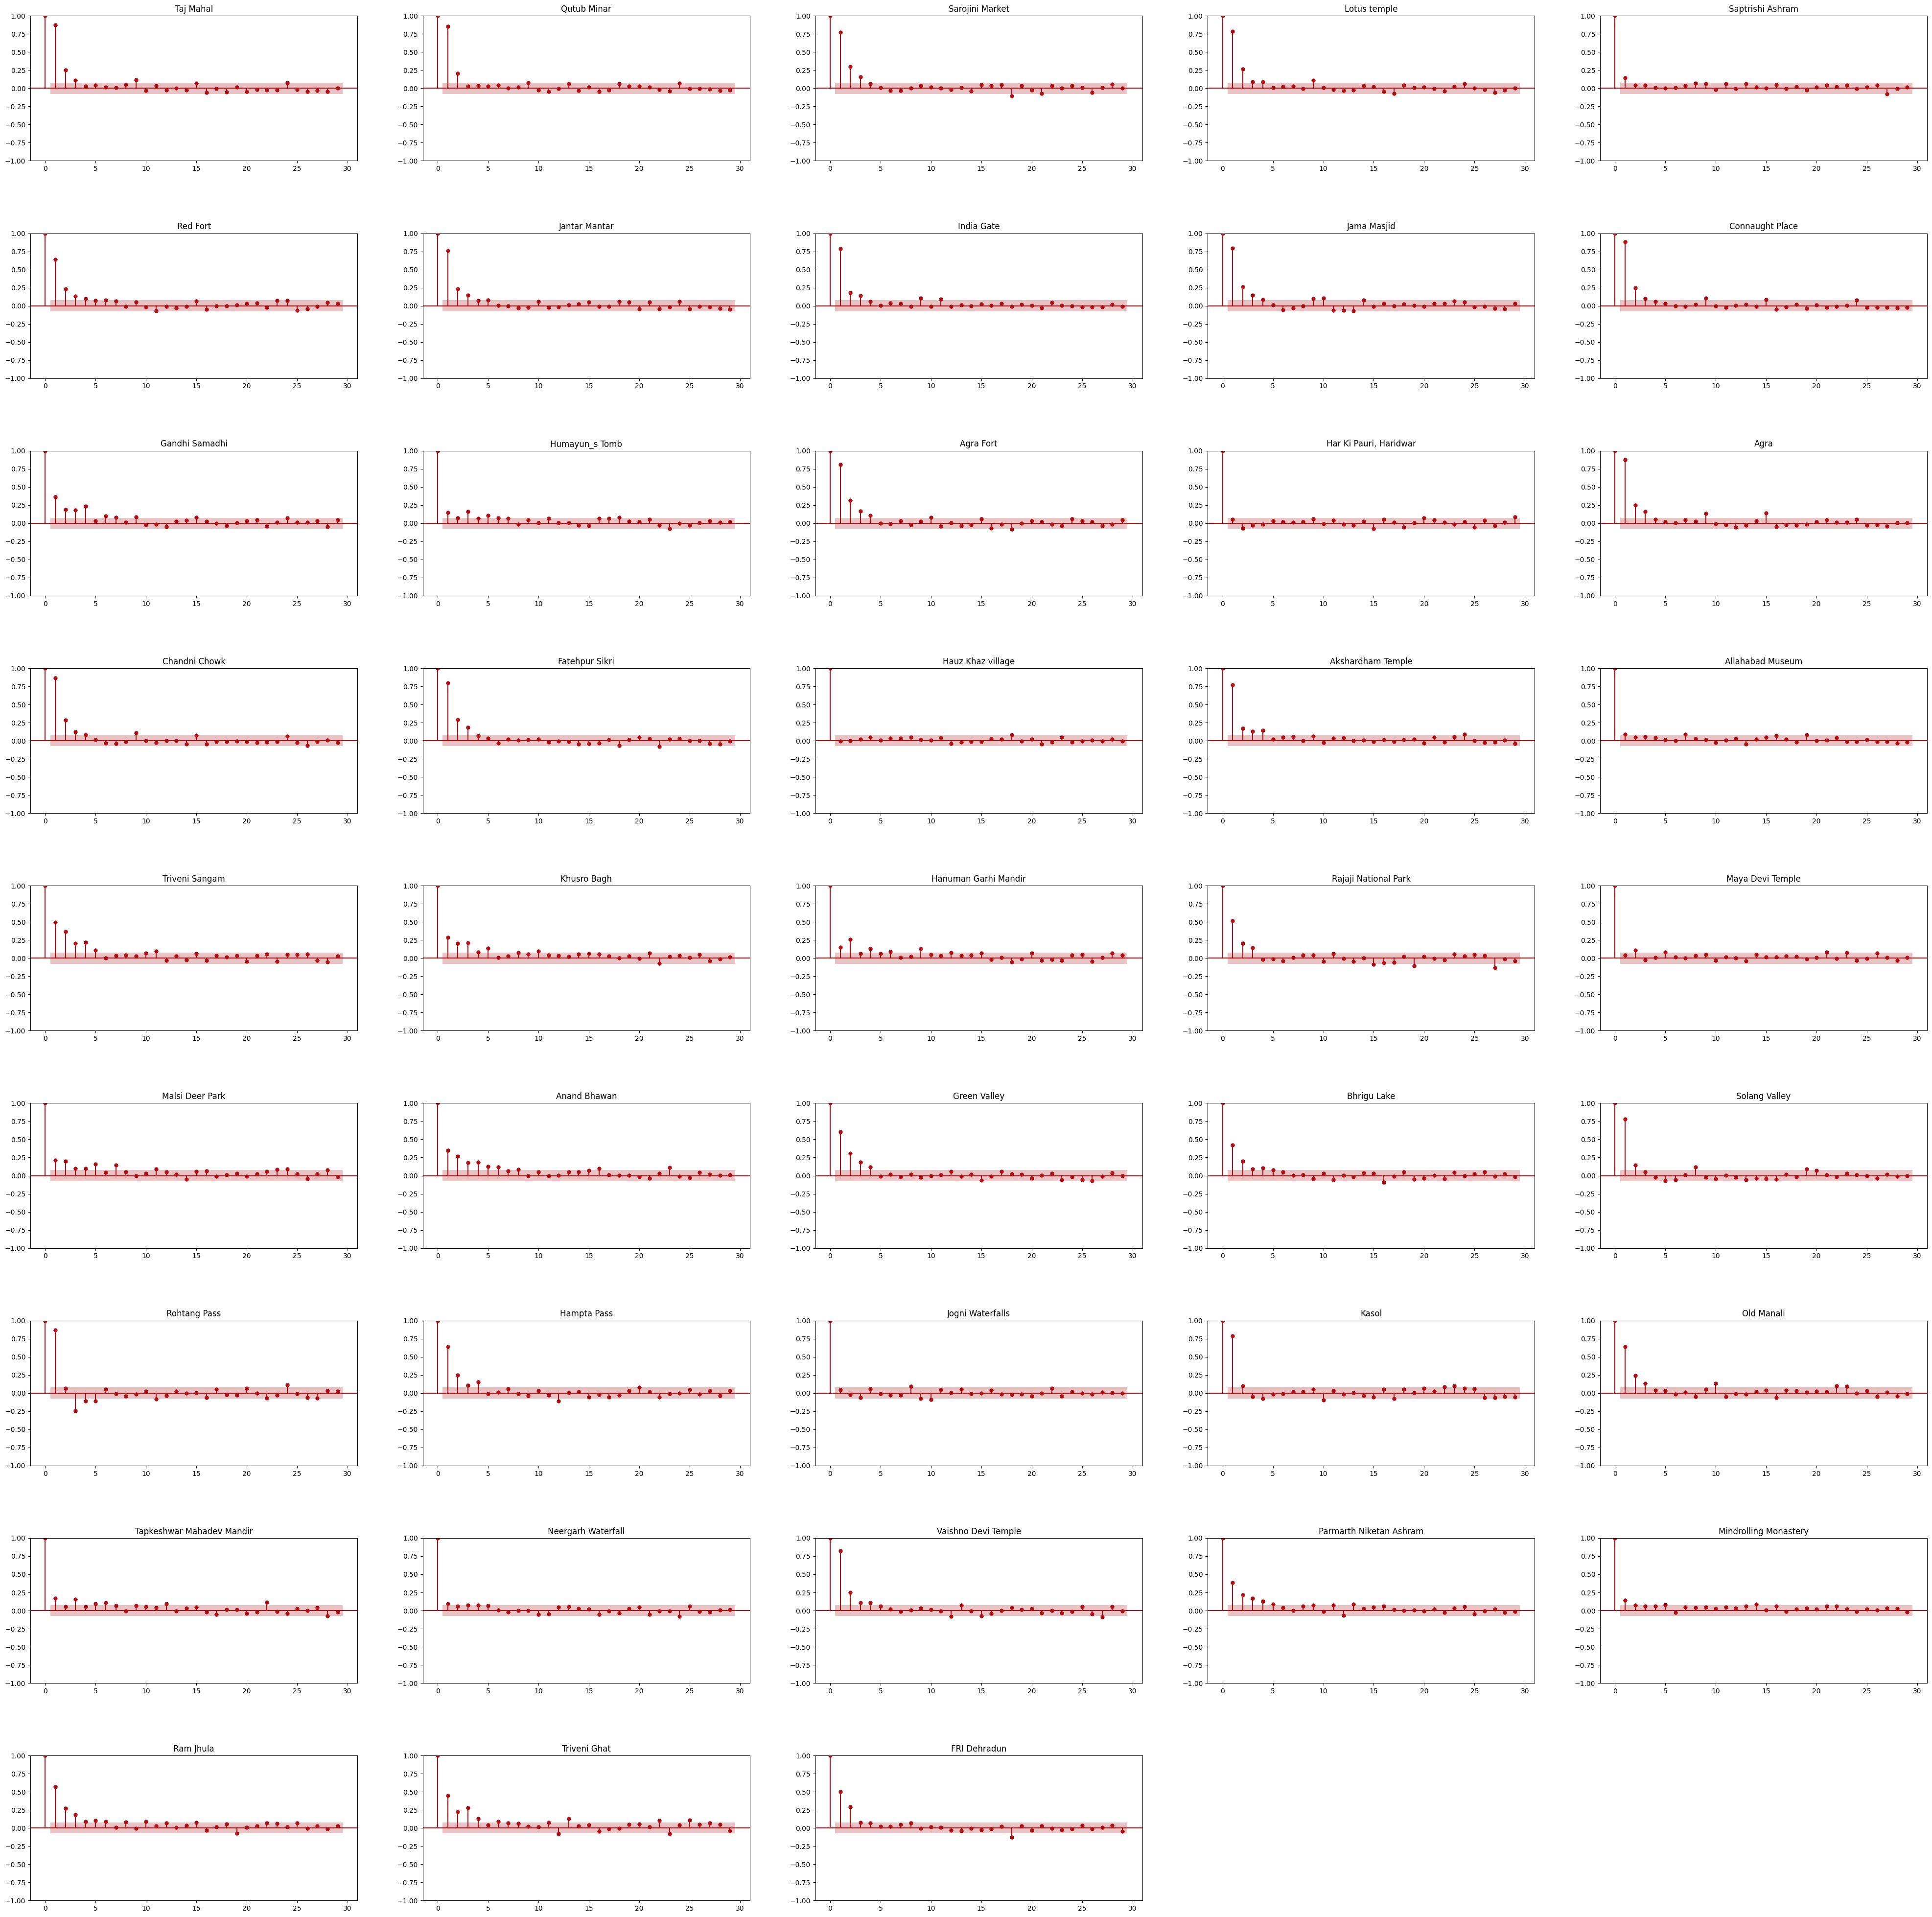

In [ ]:
fig = plt.figure(figsize=(50, 50))
plt.subplots_adjust(hspace=0.5)

ncols = 5
nrows = len(places) // ncols + (len(places) % ncols > 0)

for n,place in enumerate(places):
    ax = plt.subplot(nrows,ncols, n + 1)
    df1 = df.loc[(df['Keyword'] == place)]
    partialautocorrelation(df1,place,ax)

In [ ]:
maxlag= 12
test = 'ssr_chi2test'
result_granger = {}

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag,verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [str(var) + '_x' for var in variables]
    df.index = [str(var) + '_y' for var in variables]
    return df

In [ ]:
a = df.transpose()
a.columns = a.iloc[3]
a = a[4:]
a = a.reset_index()
a = a.drop('index',axis = 1)

<Axes: >

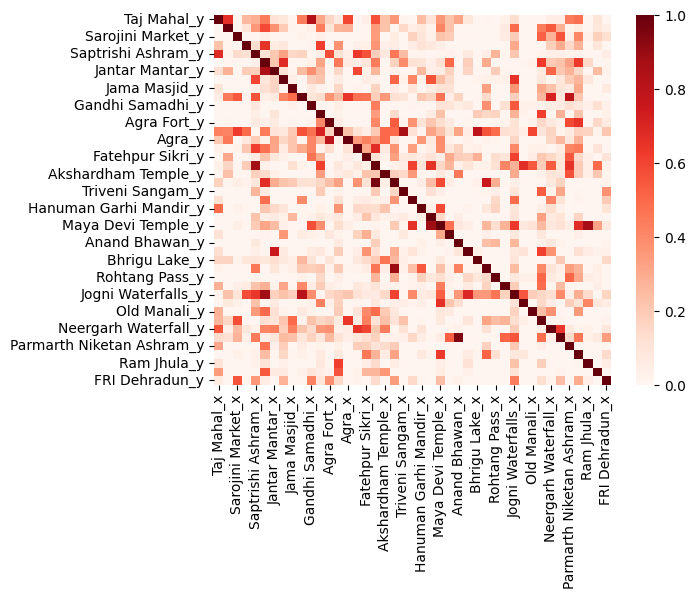

In [ ]:
sns.heatmap(grangers_causation_matrix(a,a.columns),cmap = "Reds")

#Clustering

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import zscore
from sklearn import cluster
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from tslearn.clustering import TimeSeriesKMeans

In [ ]:
def t(data,p):
  h1 = data.transpose().iloc[4:]
  h1.columns = data.transpose().iloc[3]
  decompose_result_mult = seasonal_decompose(h1,period = p)
  seasonal = decompose_result_mult.seasonal
  s1.append(seasonal[:p])

s1 = []
for place in places:
    t(month_df.loc[(month_df['Keyword'] == place)],12)

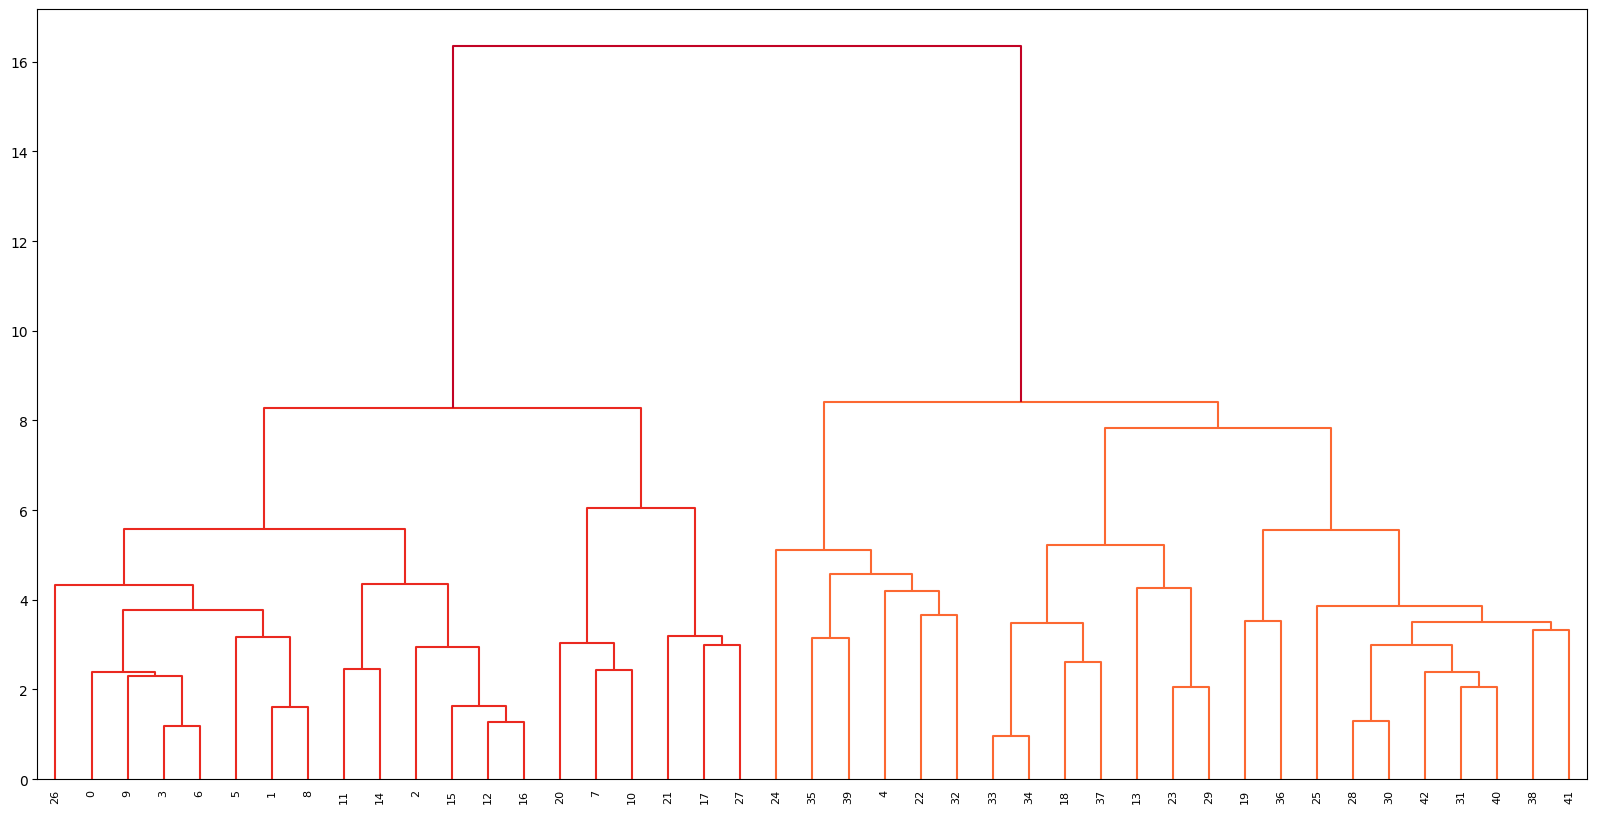

In [ ]:
sns.set_palette("YlOrRd_r")

data_norm = pd.DataFrame(s1).apply(zscore, axis=1)
Z = linkage(data_norm, method='ward', metric='euclidean')

plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.show()

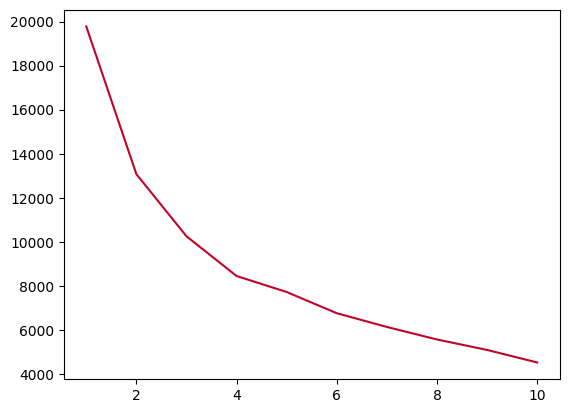

In [ ]:
wcss = []

for i in range(1,11):
  clusters = cluster.KMeans(n_clusters=i,init='k-means++',n_init = 10).fit(s1)
  wcss.append(clusters.inertia_)

plt.plot(np.arange(1,11),wcss)

In [ ]:
model = TimeSeriesKMeans(n_clusters=4, metric="dtw",
                         max_iter=10, random_state=42)
y_pred = model.fit_predict(np.array(s1))

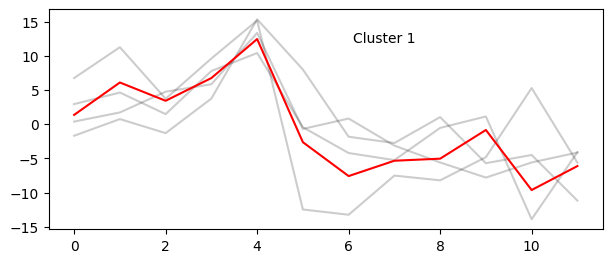

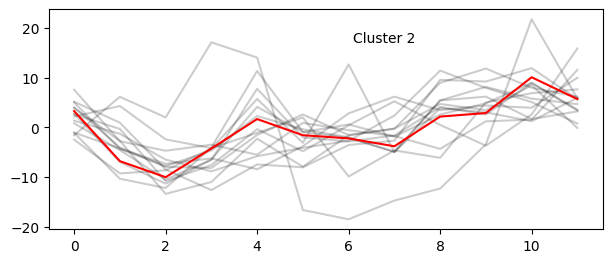

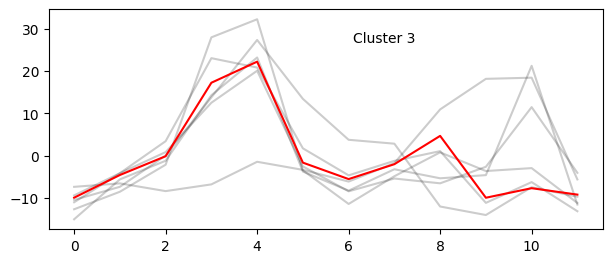

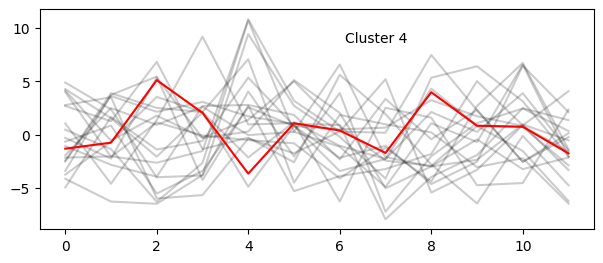

In [ ]:
for yi in range(4):
    plt.figure(figsize=(50,20))
    plt.subplot(6, 6, 7 + yi)
    for xx in np.array(s1)[y_pred == yi]:
      plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model.cluster_centers_[yi].ravel(), "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)

plt.show()

In [ ]:
centers = model.cluster_centers_
cluster_labels = model.labels_

zer = []
one = []
two = []
thr = []

for i,place in enumerate(places):
  if(cluster_labels[i] == 0):
    zer.append(place)
  elif(cluster_labels[i] == 1):
    one.append(place)
  elif(cluster_labels[i] == 2):
    two.append(place)
  elif(cluster_labels[i] == 3):
    thr.append(place)

print(zer)
print(one)
print(two)
print(thr)

['Rajaji National Park', 'Parmarth Niketan Ashram', 'Ram Jhula', 'FRI Dehradun']

['Taj Mahal', 'Qutub Minar', 'Lotus temple', 'Red Fort', 'Jantar Mantar', 'India Gate', 'Connaught Place', 'Gandhi Samadhi', 'Agra Fort', 'Chandni Chowk', 'Fatehpur Sikri', 'Triveni Sangam', 'Khusro Bagh', 'Solang Valley']

['Sarojini Market', 'Bhrigu Lake', 'Rohtang Pass', 'Hampta Pass', 'Kasol', 'Old Manali']

['Saptrishi Ashram', 'Jama Masjid', 'Humayun_s Tomb', 'Har Ki Pauri, Haridwar', 'Agra', 'Hauz Khaz village', 'Akshardham Temple', 'Allahabad Museum', 'Hanuman Garhi Mandir', 'Maya Devi Temple', 'Malsi Deer Park', 'Anand Bhawan', 'Green Valley', 'Jogni Waterfalls', 'Tapkeshwar Mahadev Mandir', 'Neergarh Waterfall', 'Vaishno Devi Temple', 'Mindrolling Monastery', 'Triveni Ghat']


In [ ]:
df.index = df.Keyword
df.index
k = df.transpose()

In [ ]:
k[one]

Keyword,Taj Mahal,Qutub Minar,Lotus temple,Red Fort,Jantar Mantar,India Gate,Connaught Place,Gandhi Samadhi,Agra Fort,Chandni Chowk,Fatehpur Sikri,Triveni Sangam,Khusro Bagh,Solang Valley
index,0,1,3,5,7,8,10,11,13,16,17,21,22,31
States,Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,Himachal Pradesh
Cities,Delhi and Agra,Delhi and Agra,Delhi and Agra,Delhi and Agra,Delhi and Agra,Delhi and Agra,Delhi and Agra,Delhi and Agra,Delhi and Agra,Delhi and Agra,Delhi and Agra,Prayagraj,Prayagraj,Shimla
Keyword,Taj Mahal,Qutub Minar,Lotus temple,Red Fort,Jantar Mantar,India Gate,Connaught Place,Gandhi Samadhi,Agra Fort,Chandni Chowk,Fatehpur Sikri,Triveni Sangam,Khusro Bagh,Solang Valley
2011-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-03,64.0,84.0,66.0,34.0,24.0,51.0,70.0,58.0,70.0,88.0,94.0,73.0,43.0,12.0
2023-09-10,62.0,83.0,59.0,36.0,23.0,50.0,80.0,80.0,75.0,85.0,71.0,57.0,20.0,10.0
2023-09-17,64.0,80.0,79.0,37.0,24.0,55.0,98.0,39.0,71.0,100.0,92.0,49.0,17.0,14.0
2023-09-24,73.0,77.0,72.0,42.0,31.0,54.0,82.0,53.0,69.0,95.0,81.0,74.0,26.0,100.0


In [ ]:
df.transpose()[zer].to_csv('/content/gdrive/MyDrive/Open IIT DA 2023-24/clusters/winter_raw.csv')
df.transpose()[one].to_csv('/content/gdrive/MyDrive/Open IIT DA 2023-24/clusters/spring_raw.csv')
df.transpose()[two].to_csv('/content/gdrive/MyDrive/Open IIT DA 2023-24/clusters/summer_raw.csv')
df.transpose()[thr].to_csv('/content/gdrive/MyDrive/Open IIT DA 2023-24/clusters/autumn_raw.csv')

# Data Set Preparation for feeding models

In [ ]:
cluster_list = ['summer','winter','autumn','spring']
season = cluster_list[0]
df_tour = pd.read_csv('All_data_footfall_weekly.csv',index_col=[0])
df_tour.index = pd.to_datetime(df_tour.index,format="%d-%m-%Y")
df_tour.rename(columns={'Agra':'Delhi and Agra'},inplace=True)

def generate_df_clusterwise(cluster):
    df_trends = pd.read_csv(cluster+'_raw.csv',index_col=[0],parse_dates=[0])
    df_trends_T = df_trends.T
    states = df_trends_T['States']
    df_trends_T = df_trends_T.iloc[:,4:].astype(float)
    df_trends_T['States'] = states
    df_states = df_trends_T.groupby('States').sum()
    df_states = df_states.T.rename(columns={'Himachal Pradesh':'HP GSI',
                                        'Uttar Pradesh':'UP GSI',
                                        'Uttarakhand':'UK GSI'})
    df_states.index = df_states.index.astype('datetime64[ns]')
    df_locs = df_trends.loc[['States','Cities']].T.reset_index()
    for state in df_locs.States.unique():
        cities = df_locs[df_locs['States']==state]['Cities'].unique()
        df_states[state] = df_tour[cities].sum(axis=1)
    df_states.dropna(inplace=True)
    return df_states


for cluster in cluster_list:
    generate_df_clusterwise(cluster).to_csv(cluster+'.csv')

# Prophet

In [ ]:
import numpy as np
import pandas as pd

from prophet import Prophet
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import math
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def lag(x,col,df1=df1,trend=trend):
  Y = pd.concat([trend,df1,df1.shift(-(x)),df1.shift(-(x+4))],axis = 1)
  Y=Y.iloc[:-(x+8)]
  df1[col] = df1[col].shift(-(x+8))
  df1=df1[:-(x+8)]
  Y.columns.values[-1] = "b"
  Y.columns.values[-2] = "a"
  Y.columns.values[-3] = "c"
  return (df1,Y)

def perform_scaling(X,df,state):
  final_df = X
  final_df["Y"] = df
  scaler = MinMaxScaler()
  fb_df = scaler.fit_transform(final_df)
  fb_df = pd.DataFrame(fb_df,columns=[state+" GSI","c","a","b","y"]) #Call the columns accordingly
  fb_df["ds"] = X.index
  return fb_df,scaler

def split_data(fb_df,year):
  test_df = fb_df[fb_df["ds"]>=year]
  y_true = test_df["y"]
  test_df = test_df.drop("y",axis=1)
  train_df = fb_df[fb_df["ds"]<year]
  return train_df,test_df,y_true

def perform_prophet(model_fbp,train_df):
  for feature in train_df.columns:
    if feature not in ["ds","y"]:
      model_fbp.add_regressor(feature)
  model_fbp = model_fbp.fit(train_df)
  return model_fbp

def get_data(location,season):
    assert location in ['HP','UP','UK'], 'wrong location'
    assert season in cluster_list
    df = pd.read_csv(season+'.csv',index_col=[0],parse_dates=[0]).loc['2011':'2022']
    df1 = df[[location+' footfall']]
    trend = df[[location+' GSI']]
    return df1,trend


In [ ]:
def test_predictions(test_df,model_fbp,y_true,scaler,isfinal=False,state,cluster):
  if not isfinal:
    forecast = model_fbp.predict(test_df)
    pred_df = test_df.drop("ds",axis=1).reset_index().drop("index",axis=1)
    pred_df["y"] = forecast["yhat"]
    dates = test_df["ds"]
    pred_df["y"] = forecast["yhat"]
    test_df["y"] = y_true
    test_df = pd.DataFrame(scaler.inverse_transform(test_df.drop("ds",axis=1)),columns=["a","b","c","d","y"])
    pred_df = pd.DataFrame(scaler.inverse_transform(pred_df),columns=["a","b","c","d","y"])
    print("RMSE:",math.sqrt(mean_squared_error(test_df["y"],pred_df["y"])))
    plt.plot(test_df["y"],"o-",color= "black")
    plt.plot(pred_df["y"],"o-",color = "firebrick")
    plt.legend(["Test","FB Prophet"])
    plt.title(f"FB Prophet Predictions {state}[{cluster}]")
  else:
    forecast = model_fbp.predict(test_df)
    pred_df = test_df.drop("ds",axis=1).reset_index().drop("index",axis=1)
    pred_df["y"] = forecast["yhat"]
    pred_df = pd.DataFrame(scaler.inverse_transform(pred_df),columns=["a","b","c","d","y"])
  return pred_df["y"]



In [ ]:
cluster_dist = {"autumn":['HP','UP'],
                "spring":['HP','UP'],
                "summer":['HP','UP','UK'],
                "winter":['UK']

                }


def apply_model_on(state,cluster,i=4):
    df1,trend = get_data(state,cluster)
    trend.index = trend.index.astype('datetime64[ns]')
    df1.index = df1.index.astype('datetime64[ns]')
    df,X = lag(i,state+' footfall') #change name of UP Footfall accordingly
    model_fbp = Prophet()
    final_df = X
    final_df["Y"] = df

    fb_df,scaler = perform_scaling(X,df,state)
    train_df,test_df,y_true = split_data(fb_df,"2021") #Change year
    model_fbp = perform_prophet(model_fbp,train_df)
    predictions = test_predictions(test_df,model_fbp,y_true,scaler,state,cluster)

In [ ]:
for cluster in cluster_dist.keys():
    for state in cluster_dist[cluster]:
        apply_model_on(state,cluster)

# LSTM

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
def prepare_state_data(main_data, state_name, n_lag=12):
    # Define the columns for each state
    state_columns = {
        'UP': ['UP GSI', 'UP footfall'],
        'HP': ['HP GSI', 'HP footfall'],
        'UK': ['UK GSI', 'UK footfall']
    }

    if state_name not in state_columns:
        print(f"{state_name} data not present.")
        return None, None

    state_columns = state_columns[state_name]

    # Check if the state's columns are present in the main data
    missing_columns = [col for col in state_columns if col not in main_data.columns]
    if missing_columns:
        print(f"{state_name} data not present.")
        return None, None

    state_data = main_data[state_columns]

    if state_data.empty:
        print(f"{state_name} data not present.")
        return None, None

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(state_data)

    # Create lag features
    reframed = series_to_supervised(scaled_data, n_lag, 1)
    # Drop unnecessary columns from reframed data
    drop_columns = [i for i in range(2, 25) if (2 <= i <= 7) or (10 <= i <= 15) or (18 <= i <= 24)]
    reframed.drop(reframed.columns[drop_columns], axis=1, inplace=True)

    return reframed, scaler

In [ ]:
def split_train_test(values, n_train_time):
    train = values[:n_train_time, :]
    test = values[n_train_time:, :]
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    # Reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

    return train_X, train_y, test_X, test_y

In [ ]:
def build_lstm_model(input_shape, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(100, input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [ ]:
def fit_and_visualize_model(model, train_X, train_y, test_X, test_y, epochs=200, batch_size=70):
    # Fit the model
    history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

    return history

In [ ]:
def get_original_scale_data(y,scaler):
    get_data = pd.DataFrame({"GSI":np.zeros(shape=y.reshape(-1).shape),
                            "footfall":y.reshape(-1)})
    t = scaler.inverse_transform(get_data)
    return t[:,1]

In [ ]:
def run_model_lstm(season,state):
    data = pd.read_csv(season+'.csv',index_col=[0],parse_dates=[0])
    df_train = data.loc[data.index < "2021"]
    df_valid = data.loc[data.index >= "2021"]
    reframed,scaler_UP = prepare_state_data(data, state)
    values = reframed.values
    train_X, train_y, test_X, test_y = split_train_test(values, df_train.shape[0])
    input_shape = (train_X.shape[1], train_X.shape[2])
    model = build_lstm_model(input_shape)
    history = fit_and_visualize_model(model, train_X, train_y, test_X, test_y)
    # make a prediction
    yhat = model.predict(test_X)
    y_actual = get_original_scale_data(test_y,scaler_UP)
    y_pred = get_original_scale_data(yhat,scaler_UP)
    # calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
    print('Test RMSE: %.3f' % rmse)
    import matplotlib.pyplot as plt
    width = 8
    height = 6

    plt.figure(figsize=(width, height))
    aa = [x for x in range(92)]
    plt.plot(aa, y_actual[:92], marker='.', label="Actual", color='black')

    plt.plot(aa, y_pred[:92], marker='o', label="Prediction", color='firebrick')

    plt.ylabel('Footfalls', size=15)
    plt.xlabel('Time step', size=15)
    plt.legend(fontsize=15)

    middle_x = (aa[0] + aa[-1]) / 2
    plt.title(f'{state}({season})', size=20, pad=20, loc='center')
    # plt.savefig(f'{state} {season}(LSTM) prediction.png', dpi=300, bbox_inches='tight')

    plt.show()
    return y_pred

In [ ]:
cluster_dist = {"autumn":['HP','UP'],
                "spring":['HP','UP'],
                "summer":['HP','UP','UK'],
                "winter":['UK']
                }
for cluster in cluster_dist.keys():
    for state in cluster_dist[cluster]:
        pred = run_model_lstm(cluster,state)
        pd.DataFrame({"preds_"+state+"_"+ cluster:pred}).to_csv("preds_"+state+"_"+ cluster+".csv")
        print('printed '+"preds_"+state+"_"+ cluster +".csv")

# Random Forest

#Results Compilation

In [ ]:
indexran = pd.date_range(start='3/1/2021', end='12/8/2022',freq = "w")

In [ ]:
fb_path = '/content/gdrive/MyDrive/Open IIT DA 2023-24/Model outputs/FB Prophet'

os.chdir(fb_path)

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [ ]:
fb_combine = pd.concat([pd.read_csv(f) for f in all_filenames],axis = 1)
fb_combine.index = indexran
fb_combine = fb_combine.transpose()

In [ ]:
fb_combine.insert(0,'State',['Himachal Pradesh','Uttar Pradesh','Uttar Pradesh','Uttar Pradesh',
                             'Uttarakhand','Uttarakhand','Himachal Pradesh','Himachal Pradesh'])
fb_combine.insert(0,'Season',['Spring','Summer','Autumn','Spring','Winter','Summer','Summer','Autumn'])

In [ ]:
lstm_path = '/content/gdrive/MyDrive/Open IIT DA 2023-24/Model outputs/LSTM prediction'

os.chdir(lstm_path)

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [ ]:
lstm_combine = pd.concat([pd.read_csv(f) for f in all_filenames],axis = 1)
lstm_combine.index = indexran
lstm_combine = lstm_combine.transpose()

In [ ]:
lstm_combine.insert(0,'State',['Uttarakhand','Himachal Pradesh','Uttar Pradesh','Himachal Pradesh',
                             'Uttar Pradesh','Himachal Pradesh','Uttarakhand','Uttar Pradesh'])
lstm_combine.insert(0,'Season',['Winter','Spring','Spring','Autumn','Autumn','Summer','Summer','Summer'])

In [ ]:
forest_path = '/content/gdrive/MyDrive/Open IIT DA 2023-24/Model outputs/forest regressor'

os.chdir(forest_path)

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [ ]:
forest_combine = pd.concat([pd.read_csv(f) for f in all_filenames],axis = 1)
forest_combine.index = indexran
forest_combine = forest_combine.transpose()
forest_combine = forest_combine.drop(['Unnamed: 0'])

In [ ]:
forest_combine.insert(0,'State',['Uttar Pradesh','Uttar Pradesh','Himachal Pradesh','Himachal Pradesh',
                             'Uttarakhand','Uttar Pradesh','Himachal Pradesh','Uttarakhand'])
forest_combine.insert(0,'Season',['Summer','Spring','Spring','Summer','Summer','Autumn','Autumn','Winter'])

In [ ]:
merged = pd.concat([lstm_combine.groupby('State').max(),
                    forest_combine.groupby('State').max(),
                    fb_combine.groupby('State').max()])

In [ ]:
merged = merged.drop('Season',axis =1)

In [ ]:
merged

,2021-03-07,2021-03-14,2021-03-21,2021-03-28,2021-04-04,2021-04-11,2021-04-18,2021-04-25,2021-05-02,2021-05-09,...,2022-10-02,2022-10-09,2022-10-16,2022-10-23,2022-10-30,2022-11-06,2022-11-13,2022-11-20,2022-11-27,2022-12-04
State,,,,,,,,,,,,,,,,,,,,,
Himachal Pradesh,6.714989e+04,6.171358e+04,6.611499e+04,6.245517e+04,6.126185e+04,5.018850e+04,3.943265e+04,5.268051e+04,5.332835e+04,4.203046e+04,...,1.564531e+05,1.069885e+05,1.498207e+05,1.490346e+05,1.513165e+05,1.287845e+05,1.521802e+05,1.597635e+05,1.480908e+05,1.479129e+05
Uttar Pradesh,3.338517e+07,2.497362e+07,3.426276e+07,3.539555e+07,3.519910e+07,2.954367e+07,2.979612e+07,3.414224e+07,3.419487e+07,2.217939e+07,...,2.356445e+07,2.216716e+07,2.436829e+07,2.299917e+07,2.254825e+07,2.131647e+07,2.392157e+07,2.064167e+07,2.154797e+07,2.100891e+07
Uttarakhand,4.179181e+05,8.499634e+05,2.996783e+05,3.278392e+05,3.603060e+05,6.560227e+05,5.970073e+05,4.286451e+05,4.241383e+05,1.032125e+06,...,8.176843e+05,1.581751e+06,9.527895e+05,1.218649e+06,1.419365e+06,2.106395e+06,9.124321e+05,2.782630e+06,2.234096e+06,2.449391e+06
Himachal Pradesh,4.517004e+04,4.356782e+04,4.753130e+04,3.844582e+04,3.635323e+04,3.018503e+04,2.864070e+04,2.694113e+04,2.745268e+04,2.768441e+04,...,1.568776e+05,1.584704e+05,1.511549e+05,1.509035e+05,1.447044e+05,1.445173e+05,1.480746e+05,1.477198e+05,1.513419e+05,1.664744e+05
Uttar Pradesh,4.012344e+07,3.924731e+07,4.027942e+07,3.960664e+07,3.560880e+07,3.355335e+07,3.349431e+07,3.306820e+07,3.242056e+07,3.173979e+07,...,2.131224e+07,2.114582e+07,2.133808e+07,2.175469e+07,2.188709e+07,2.201020e+07,2.264680e+07,2.274262e+07,2.346528e+07,2.397011e+07
Uttarakhand,3.485434e+05,3.221082e+05,3.332020e+05,3.859554e+05,4.448399e+05,4.392780e+05,4.707230e+05,5.223633e+05,5.083210e+05,6.368440e+05,...,1.315818e+06,1.576527e+06,1.730030e+06,2.001971e+06,2.029425e+06,2.028494e+06,2.046933e+06,2.065406e+06,2.037136e+06,2.041795e+06
Himachal Pradesh,3.292558e+04,2.959156e+04,2.819065e+04,2.761859e+04,2.701932e+04,2.621104e+04,2.519389e+04,2.405308e+04,2.295697e+04,2.196977e+04,...,1.389607e+05,1.375428e+05,1.359235e+05,1.359403e+05,1.383065e+05,1.406663e+05,1.429628e+05,1.452541e+05,1.474981e+05,1.625204e+05
Uttar Pradesh,3.754839e+07,3.706683e+07,3.659919e+07,3.613614e+07,3.554153e+07,3.498366e+07,3.437229e+07,3.372340e+07,3.306481e+07,3.245647e+07,...,2.486974e+07,2.511773e+07,2.537560e+07,2.563430e+07,2.591903e+07,2.622001e+07,2.654813e+07,2.677599e+07,2.706475e+07,2.736134e+07
Uttarakhand,2.906959e+05,3.075756e+05,3.365195e+05,3.738307e+05,4.167408e+05,4.570049e+05,4.883523e+05,5.189974e+05,5.560273e+05,5.994754e+05,...,2.098689e+06,2.297315e+06,2.502276e+06,2.720566e+06,3.012573e+06,3.318264e+06,3.644183e+06,3.980898e+06,4.327643e+06,4.684910e+06


#Ensemble

In [ ]:
footfall = pd.read_csv('/content/gdrive/MyDrive/Open IIT DA 2023-24/All_data_footfall_weekly.csv')
footfall.index = footfall['Date']

In [ ]:
footfall

,Date,Dehradun,Haridwar,Rishikesh,Agra,Ayodhya,Prayagraj,Shimla,Dalhousie,Kullu and Manali
Date,,,,,,,,,,
07-01-2010,07-01-2010,81943,50131,48462,2438551,4643863,27957813,41035,21452,69816
14-01-2010,14-01-2010,79429,49283,48359,2480258,4697741,27495240,41568,21723,69338
28-01-2010,28-01-2010,76989,73991,48350,2520135,4746943,26997538,42118,21992,68823
31-01-2010,31-01-2010,74622,60381,48430,2558226,4791574,26467596,42682,22260,68275
07-02-2010,07-02-2010,92149,39122,41689,96467,172646,4923135,46632,10808,32472
...,...,...,...,...,...,...,...,...,...,...
04-12-2022,04-12-2022,406117,3572265,154887,13642516,15218287,6615071,14326,5408,152972
11-12-2022,11-12-2022,434630,3890480,164102,14502484,16060991,5079087,19878,7481,155380
18-12-2022,18-12-2022,464468,4219817,173687,15395740,16937858,3470683,25697,9655,157761


In [ ]:
footfall['Himachal Pradesh'] = footfall['Shimla'] + footfall['Dalhousie'] + footfall['Kullu and Manali']

In [ ]:
train_foot = footfall[582:-4]

In [ ]:
temp = merged.loc['Himachal Pradesh'].T
temp['Prediction'] = temp.max(numeric_only=True, axis=1)

In [ ]:
temp.index.name = "Himachal Pradesh"

In [ ]:
temp = merged[merged['State'] == 'Himachal Pradesh'].transpose()
temp = temp.drop(['Season','State'])

In [ ]:
temp['Footfall'] = np.array(train_foot['Himachal Pradesh'])

In [ ]:
MSE = abs(temp['Footfall'] - temp['Prediction'])
maxval = MSE.max()
MSE = MSE**2
msesum = MSE.sum()
msesum**(1/2)

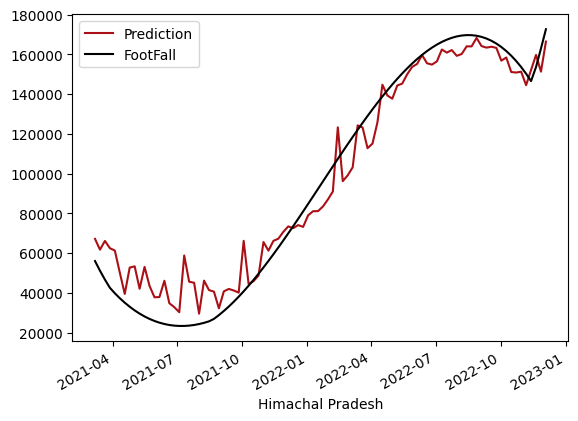

In [ ]:
sns.set_palette("Reds_r")
temp.loc[:,'Prediction'].plot()
temp.loc[:,'Footfall'].plot(color = "black")
plt.legend(["Prediction","FootFall"])

In [ ]:
temp

,Season,2021-03-07 00:00:00,2021-03-14 00:00:00,2021-03-21 00:00:00,2021-03-28 00:00:00,2021-04-04 00:00:00,2021-04-11 00:00:00,2021-04-18 00:00:00,2021-04-25 00:00:00,2021-05-02 00:00:00,...,2022-10-02 00:00:00,2022-10-09 00:00:00,2022-10-16 00:00:00,2022-10-23 00:00:00,2022-10-30 00:00:00,2022-11-06 00:00:00,2022-11-13 00:00:00,2022-11-20 00:00:00,2022-11-27 00:00:00,2022-12-04 00:00:00
State,,,,,,,,,,,,,,,,,,,,,
Himachal Pradesh,Summer,67149.888704,61713.582485,66114.991870,62455.169894,61261.852677,50188.502477,39432.651262,52680.513235,53328.350310,...,156453.131441,106988.529913,149820.668478,149034.555593,151316.464269,128784.468290,152180.155191,159763.484871,148090.806829,147912.934534
Himachal Pradesh,Summer,45170.040000,43567.820000,47531.300000,38445.820000,36353.230000,30185.030000,28640.700000,26941.130000,27452.680000,...,156877.610000,158470.380000,151154.930000,150903.450000,144704.400000,144517.340000,148074.640000,147719.840000,151341.900000,166474.350000
Himachal Pradesh,Summer,32925.581825,29591.562404,28190.645044,27618.590108,27019.324307,26211.039088,25193.894084,24053.082785,22956.970782,...,138960.657074,137542.822796,135923.502247,135940.310380,138306.456560,140666.305735,142962.796058,145254.086670,147498.137890,162520.357751


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from hyperopt import STATUS_OK
from hyperopt import hp

In [ ]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [ ]:
def objective(space):
    clf=XGBRegressor(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))

    evaluation = [( X[:-40], y[:-40]), ( X[-40:], y[-40:])]

    clf.fit(X[:-40], y[:-40],
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)


    pred = clf.predict(X[-40:])
    accuracy = cross_val_score(clf,X[-40:],y[-40:],scoring = "neg_root_mean_squared_error", cv = 5).mean()
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
from hyperopt import tpe
tpe_algorithm = tpe.suggest
from hyperopt import Trials
trials = Trials()
from hyperopt import fmin
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

In [ ]:
best_hyperparams

{'colsample_bytree': 0.6268835989391717,
 'gamma': 1.396141615092394,
 'max_depth': 10.0,
 'min_child_weight': 6.0,
 'reg_alpha': 179.0,
 'reg_lambda': 0.31666720065511045}

In [ ]:
features = pd.read_csv('/content/gdrive/MyDrive/Open IIT DA 2023-24/combined_csv_features.csv')

In [ ]:
features.index = features['Unnamed: 0']
features.index = pd.to_datetime(features.index)
features = features.drop("Unnamed: 0",axis = 1)

In [ ]:
features

,Uttar Pradesh,Uttarakhand,Himachal Pradesh,Curtosis_Uttar Pradesh,Skewness_Uttar Pradesh,Volatility_Uttar Pradesh,Entropy_Uttar Pradesh,Curtosis_Uttarakhand,Skewness_Uttarakhand,Volatility_Uttarakhand,Entropy_Uttarakhand,Curtosis_Himachal Pradesh,Skewness_Himachal Pradesh,Volatility_Himachal Pradesh,Entropy_Himachal Pradesh
Unnamed: 0,,,,,,,,,,,,,,,
2011-01-02,53.250000,67.80,58.833333,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000
2011-01-09,49.500000,2.60,68.333333,-2.000000,0.000000,0.049105,1.000000,-2.000000,0.000000,0.853766,1.000000,-2.000000,0.000000,0.124398,1.000000
2011-01-16,37.000000,42.20,55.666667,-1.500000,-1.361301,0.157566,1.584963,-1.500000,-0.626376,0.608325,1.584963,-1.500000,1.293343,0.122073,1.584963
2011-01-23,47.250000,41.50,42.833333,-0.933800,-1.250897,0.128800,2.000000,-0.960930,-0.726495,0.498051,2.000000,-1.042353,-0.456382,0.195080,2.000000
2011-01-30,9.250000,52.25,46.500000,-0.323437,-1.670027,0.329989,2.321928,-0.450554,-1.127904,0.446051,2.321928,-1.235747,0.284416,0.187849,2.321928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-03,154.500000,132.10,103.166667,-0.023294,0.306122,0.772884,9.246421,1.274698,0.879397,0.612820,9.139540,0.595479,0.846916,0.655786,9.019625
2023-09-10,96.833333,101.05,100.250000,-0.018719,0.306994,0.772313,9.248786,1.272205,0.876600,0.612562,9.142066,0.601377,0.848084,0.655298,9.022332
2023-09-17,137.861111,99.40,85.583333,-0.021335,0.303829,0.772139,9.251147,1.270747,0.874072,0.612275,9.144588,0.606535,0.850369,0.654947,9.025034


In [ ]:
features
stri = "Himachal Pradesh"

hima = []
for col in features.columns:
  if(col.find(stri) != -1):
    hima.append(col)

In [ ]:
k1 = features[531:-43]

<Axes: xlabel='Unnamed: 0'>

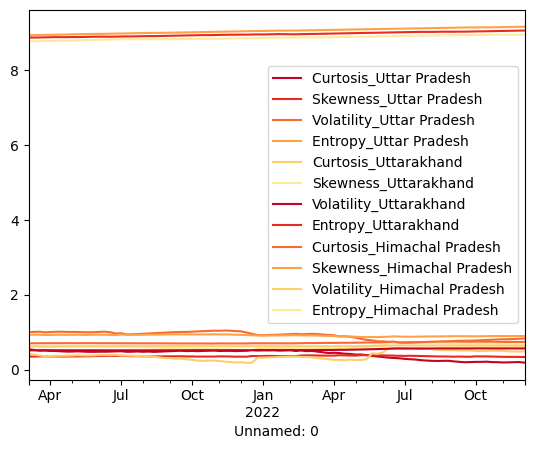

In [ ]:
k1.iloc[:,3:].plot()

In [ ]:
kurt = []
for col in k1.columns:
  if(col.find("Entropy") != -1):
    kurt.append(col)

In [ ]:
kurt

['Entropy_Uttar Pradesh', 'Entropy_Uttarakhand', 'Entropy_Himachal Pradesh']

In [ ]:
k1.index = pd.to_datetime(k1.index)

In [ ]:
features[kurt]

,Curtosis_Uttar Pradesh,Curtosis_Uttarakhand,Curtosis_Himachal Pradesh
Unnamed: 0,,,
2021-03-07,0.551708,0.425219,1.004002
2021-03-14,0.530945,0.406599,1.012308
2021-03-21,0.510852,0.384296,1.017627
2021-03-28,0.514175,0.361789,1.000623
2021-04-04,0.504101,0.368484,1.008752
...,...,...,...
2022-11-06,0.196349,0.508750,0.815308
2022-11-13,0.198972,0.491697,0.816663
2022-11-20,0.204251,0.489374,0.822496


Text(0.5, 0, '')

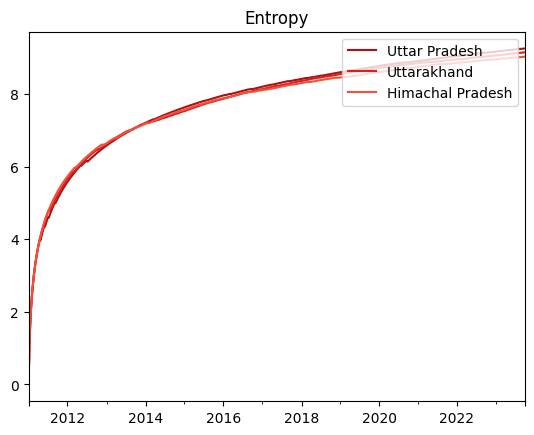

In [ ]:
features[kurt].plot()
plt.title("Entropy")
plt.legend(["Uttar Pradesh","Uttarakhand","Himachal Pradesh"],loc = "upper right")
plt.xlabel("")

In [ ]:
k = k1[hima]

In [ ]:
t = pd.concat([temp,k],axis = 1)

In [ ]:
temp

State,Himachal Pradesh,Himachal Pradesh,Himachal Pradesh,Footfall
2021-03-07,67149.888704,45170.04,32925.581825,55983
2021-03-14,61713.582485,43567.82,29591.562404,51119
2021-03-21,66114.991870,47531.30,28190.645044,46634
2021-03-28,62455.169894,38445.82,27618.590108,42520
2021-04-04,61261.852677,36353.23,27019.324307,39755
...,...,...,...,...
2022-11-06,128784.468290,144517.34,140666.305735,150305
2022-11-13,152180.155191,148074.64,142962.796058,146590
2022-11-20,159763.484871,147719.84,145254.086670,153651
2022-11-27,148090.806829,151341.90,147498.137890,163012


In [ ]:
data = temp.values
X, y = data[:, :-1], data[:, -1]
model = XGBRegressor()
model.fit(X[:-40],y[:-40])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

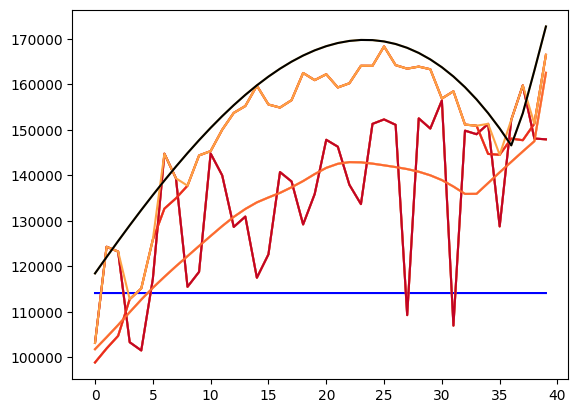

In [ ]:
yhat = model.predict(X[-40:])
plt.plot(yhat,color = "blue")

for cols in temp.columns:
  plt.plot(temp[cols].values[-40:])
plt.plot(y[-40:],color = "black")
plt.show()